In [51]:
#import required packages
#basics
import pandas as pd 
import numpy as np

#misc
import gc
import time
import warnings

#stats
from scipy.misc import imread
from scipy import sparse
import scipy.stats as ss

#viz
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec 
import seaborn as sns
from wordcloud import WordCloud ,STOPWORDS
from PIL import Image

#nlp
import string
import re    #for regex
import nltk, os
from nltk.corpus import stopwords
# import spacy
from nltk import pos_tag
from nltk.stem.wordnet import WordNetLemmatizer 
from nltk.tokenize import word_tokenize
# Tweet tokenizer does not split at apostophes which is what we want
from nltk.tokenize import TweetTokenizer   
from keras.preprocessing.text import Tokenizer



#FeatureEngineering
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer, HashingVectorizer
from sklearn.decomposition import TruncatedSVD
from sklearn.base import BaseEstimator, ClassifierMixin
from sklearn.utils.validation import check_X_y, check_is_fitted
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import log_loss
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import train_test_split


import keras
import tensorflow as tf
import pandas as pd
import numpy as np
import os, re
from gensim.models import KeyedVectors
from wordcloud import WordCloud, STOPWORDS
from tqdm import tqdm
import matplotlib.pyplot as plt
from collections import Counter
from operator import itemgetter
import nltk
from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split
from sklearn import metrics
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.layers import Dense, Input, LSTM, Embedding, Dropout, Activation, CuDNNGRU, Conv1D, GRU, concatenate
from keras.layers import Bidirectional, GlobalMaxPool1D
from keras.models import Model
from keras import initializers, regularizers, constraints, optimizers, layers
from keras.layers import Bidirectional, GlobalMaxPool1D, Dropout, SpatialDropout1D, GlobalAveragePooling1D, GlobalMaxPooling1D
from keras.callbacks import LearningRateScheduler


from nltk.stem import PorterStemmer
ps = PorterStemmer()
from nltk.stem.lancaster import LancasterStemmer
lc = LancasterStemmer()
from nltk.stem import SnowballStemmer
sb = SnowballStemmer("english")
import gc

In [2]:
path= '/home/FRACTAL/naquib.alam/kaggle/jigsaw_unintended_bias_toxic_comment/'
nltk.download('stopwords')
nltk.download('wordnet')
stop_words = set(stopwords.words('english')) 

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/FRACTAL/naquib.alam/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /home/FRACTAL/naquib.alam/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [3]:
files= os.listdir(f'{path}data')
files

['train.csv', 'sample_submission.csv', 'test.csv']

In [4]:
train= pd.read_csv(f'{path}data/train.csv')
test= pd.read_csv(f'{path}data/test.csv')
train.shape, test.shape

((1804874, 45), (97320, 2))

In [5]:
train.columns, test.columns

(Index(['id', 'target', 'comment_text', 'severe_toxicity', 'obscene',
        'identity_attack', 'insult', 'threat', 'asian', 'atheist', 'bisexual',
        'black', 'buddhist', 'christian', 'female', 'heterosexual', 'hindu',
        'homosexual_gay_or_lesbian', 'intellectual_or_learning_disability',
        'jewish', 'latino', 'male', 'muslim', 'other_disability',
        'other_gender', 'other_race_or_ethnicity', 'other_religion',
        'other_sexual_orientation', 'physical_disability',
        'psychiatric_or_mental_illness', 'transgender', 'white', 'created_date',
        'publication_id', 'parent_id', 'article_id', 'rating', 'funny', 'wow',
        'sad', 'likes', 'disagree', 'sexual_explicit',
        'identity_annotator_count', 'toxicity_annotator_count'],
       dtype='object'), Index(['id', 'comment_text'], dtype='object'))

In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1804874 entries, 0 to 1804873
Data columns (total 45 columns):
id                                     int64
target                                 float64
comment_text                           object
severe_toxicity                        float64
obscene                                float64
identity_attack                        float64
insult                                 float64
threat                                 float64
asian                                  float64
atheist                                float64
bisexual                               float64
black                                  float64
buddhist                               float64
christian                              float64
female                                 float64
heterosexual                           float64
hindu                                  float64
homosexual_gay_or_lesbian              float64
intellectual_or_learning_disability    float

In [7]:
train.isnull().sum()


id                                           0
target                                       0
comment_text                                 0
severe_toxicity                              0
obscene                                      0
identity_attack                              0
insult                                       0
threat                                       0
asian                                  1399744
atheist                                1399744
bisexual                               1399744
black                                  1399744
buddhist                               1399744
christian                              1399744
female                                 1399744
heterosexual                           1399744
hindu                                  1399744
homosexual_gay_or_lesbian              1399744
intellectual_or_learning_disability    1399744
jewish                                 1399744
latino                                 1399744
male         

In [8]:
train_target_nonzero= train[train['target']!=0]
train_target_zero= train[train['target']==0]
train_target_pos= train[train['target']>=0.5]
print(train_target_nonzero.shape, train_target_zero.shape, train_target_pos.shape)
train_target_nonzero.shape[0]/train.shape[0]*100, train_target_zero.shape[0]/train.shape[0]*100, train_target_pos.shape[0]/train.shape[0]*100

(540110, 45) (1264764, 45) (144334, 45)


(29.92508064274847, 70.07491935725153, 7.99690172277954)

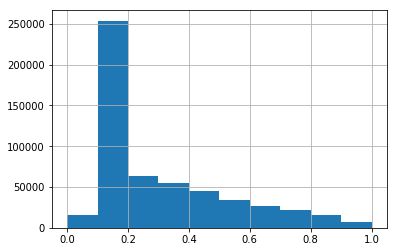

In [9]:
train_target_nonzero['target'].hist(bins=10)
plt.show()

In [10]:
identity_cols= ['asian', 'atheist', 'bisexual',
        'black', 'buddhist', 'christian', 'female', 'heterosexual', 'hindu',
        'homosexual_gay_or_lesbian', 'intellectual_or_learning_disability',
        'jewish', 'latino', 'male', 'muslim', 'other_disability',
        'other_gender', 'other_race_or_ethnicity', 'other_religion',
        'other_sexual_orientation', 'physical_disability',
        'psychiatric_or_mental_illness', 'transgender', 'white']

train_identity_labels= train[train[identity_cols[0]].isnull()==False]
identity_cols_nonzero= {}
for label in identity_cols:
    identity_cols_nonzero[label]= train_identity_labels.loc[train_identity_labels[label]!=0, label].values
train_identity_labels_asian= train_identity_labels[train_identity_labels['white']!=0]
train_identity_labels.shape, train_identity_labels_asian.shape

((405130, 45), (29948, 45))

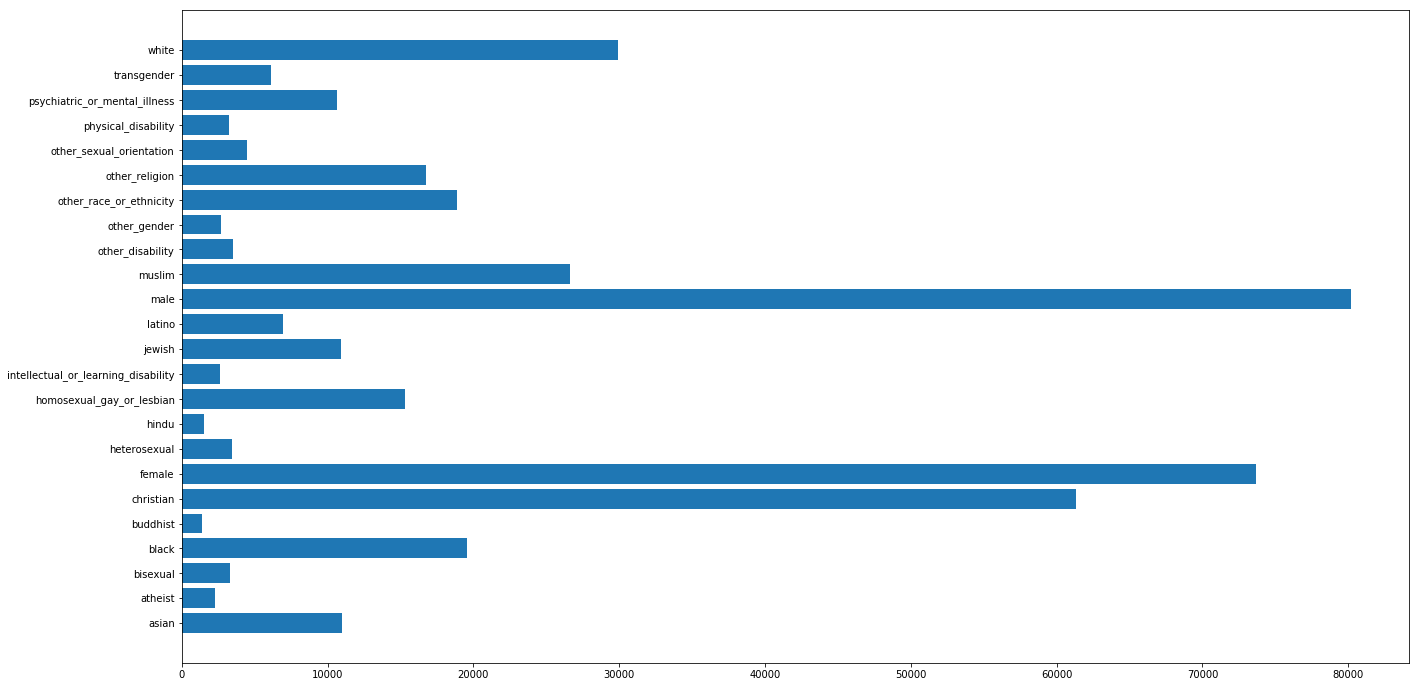

[10975,
 2253,
 3330,
 19563,
 1366,
 61360,
 73690,
 3453,
 1557,
 15307,
 2648,
 10905,
 6936,
 80179,
 26650,
 3545,
 2723,
 18867,
 16732,
 4508,
 3227,
 10665,
 6120,
 29948]

In [11]:
identity_cols_nonzero_shape= []
for key,val in identity_cols_nonzero.items():
    identity_cols_nonzero_shape.append(val.shape[0])
plt.figure(figsize=(22,12))
plt.barh(identity_cols, identity_cols_nonzero_shape)
plt.show()
identity_cols_nonzero_shape

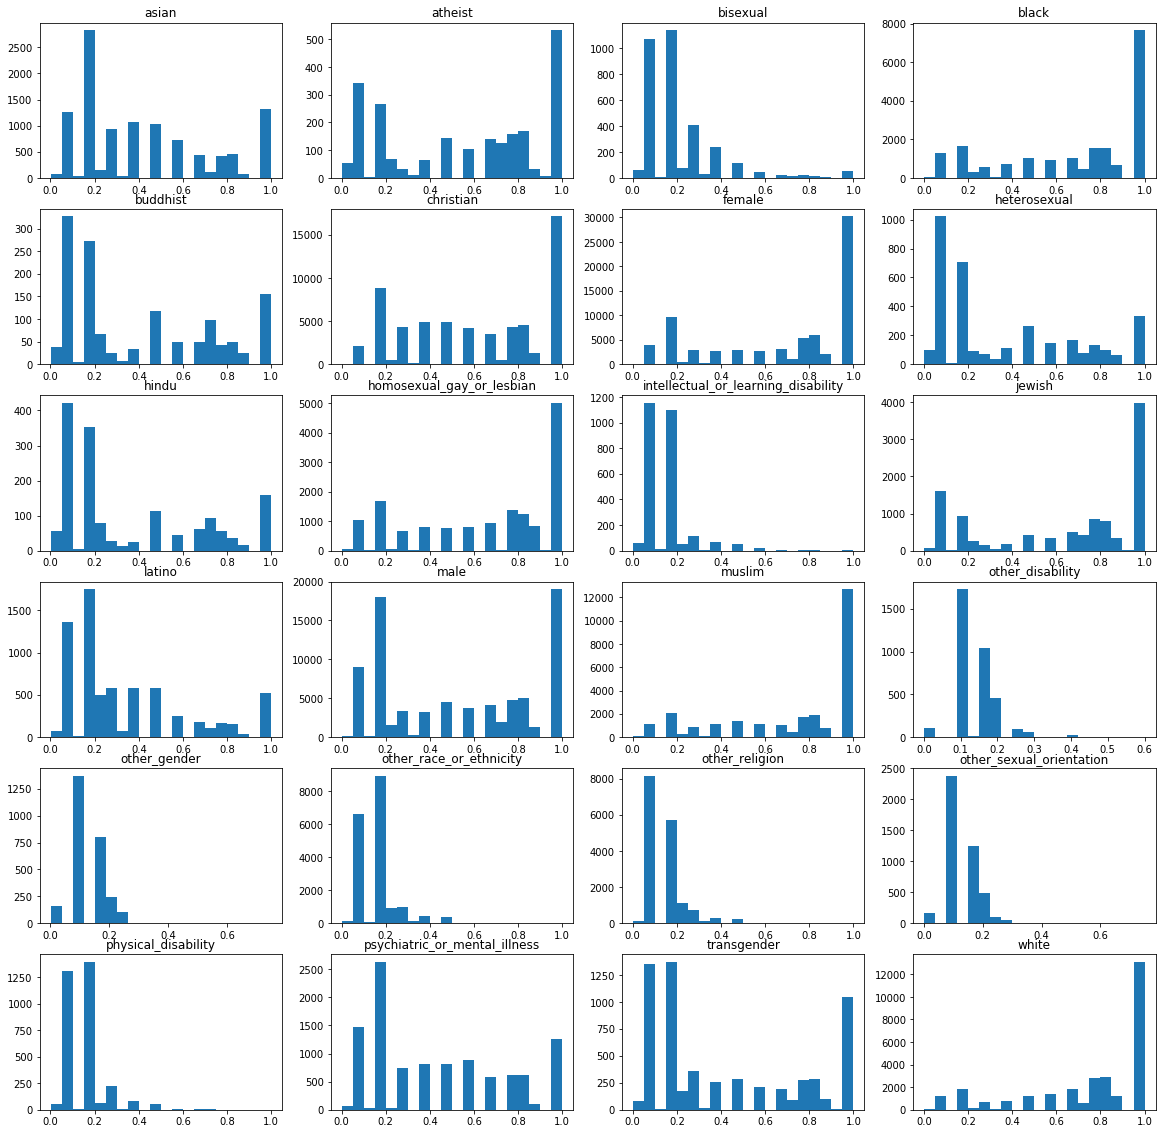

In [12]:
fig, axes = plt.subplots(6,4, figsize=(20,20))
for i in range(6):
    for j in range(4):
        axes[i,j].hist(identity_cols_nonzero[identity_cols[i*4+j]], bins=20)
        axes[i,j].set_title(identity_cols[i*4+j])
# plt.hist(identity_cols_nonzero[identity_cols[3]], bins=20)
plt.show()

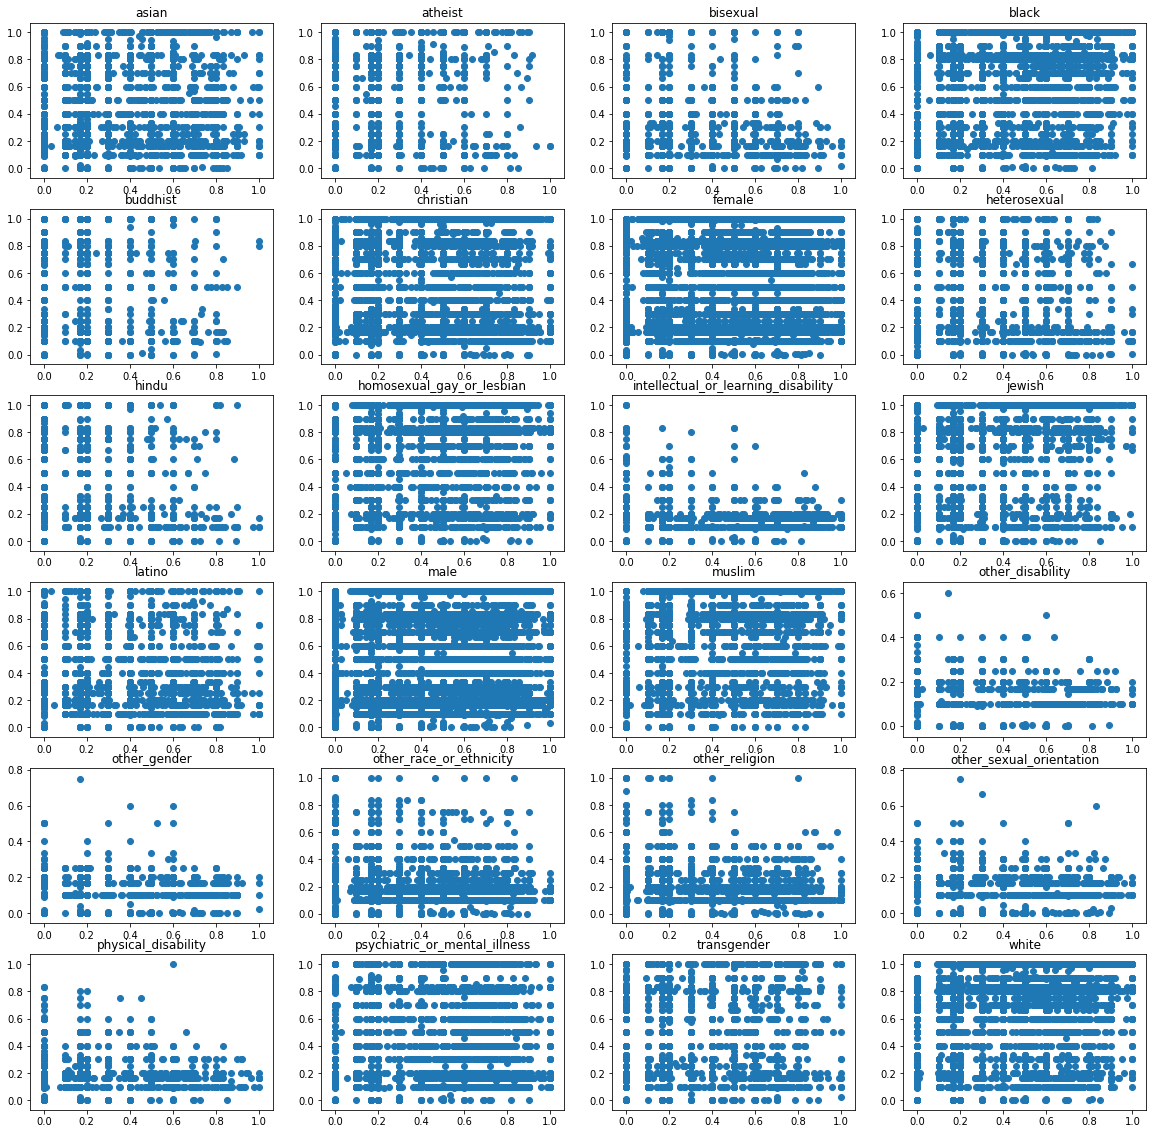

In [13]:
fig, axes = plt.subplots(6,4, figsize=(20,20))
for i in range(6):
    for j in range(4):
        axes[i,j].scatter(train_identity_labels.loc[train_identity_labels[identity_cols[i*4+j]]!=0, 'target'], train_identity_labels.loc[train_identity_labels[identity_cols[i*4+j]]!=0, identity_cols[i*4+j]])
        axes[i,j].set_title(identity_cols[i*4+j])
# plt.hist(identity_cols_nonzero[identity_cols[3]], bins=20)
plt.show()

In [14]:
# train_identity_labels[(train_identity_labels['target']==0)&(train_identity_labels[identity_cols[2]]!=0)]

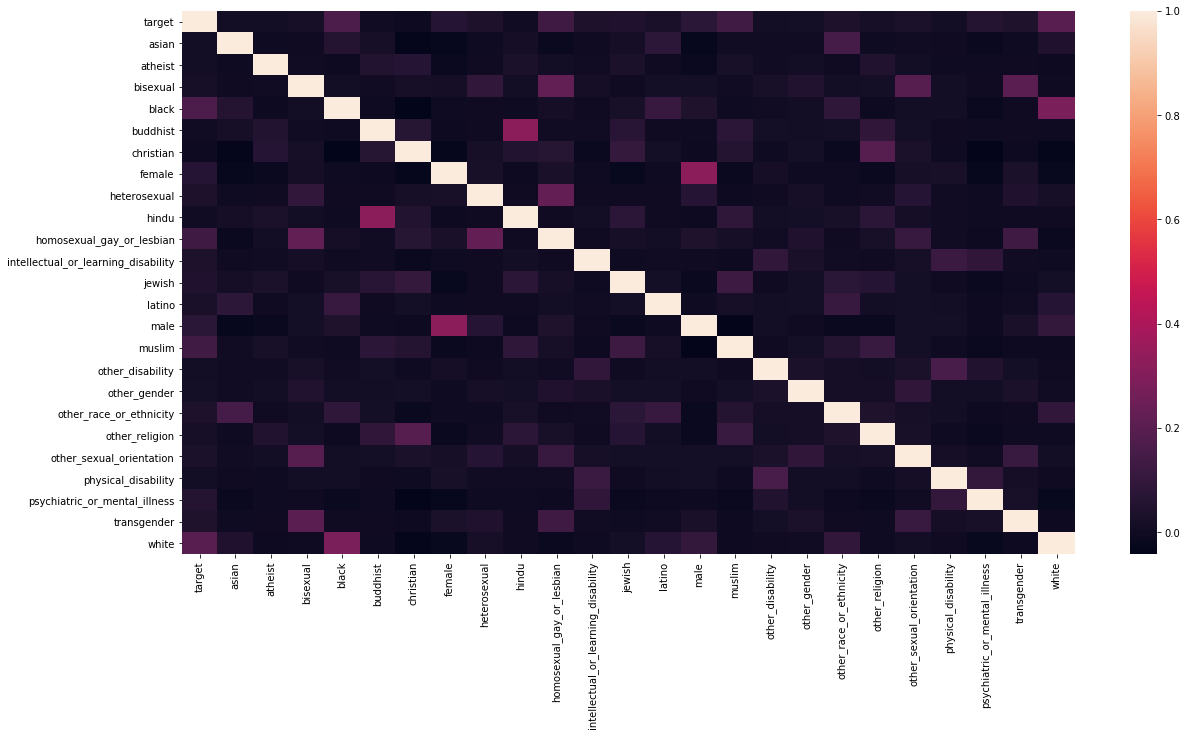

In [15]:
plt.figure(figsize=(20,10))
train_identity_labels_corr= train_identity_labels[['target']+identity_cols]
sns.heatmap(train_identity_labels_corr.corr())
plt.show()

In [16]:
['target']+ identity_cols

['target',
 'asian',
 'atheist',
 'bisexual',
 'black',
 'buddhist',
 'christian',
 'female',
 'heterosexual',
 'hindu',
 'homosexual_gay_or_lesbian',
 'intellectual_or_learning_disability',
 'jewish',
 'latino',
 'male',
 'muslim',
 'other_disability',
 'other_gender',
 'other_race_or_ethnicity',
 'other_religion',
 'other_sexual_orientation',
 'physical_disability',
 'psychiatric_or_mental_illness',
 'transgender',
 'white']

In [17]:
train['rating'].value_counts()

approved    1684758
rejected     120116
Name: rating, dtype: int64

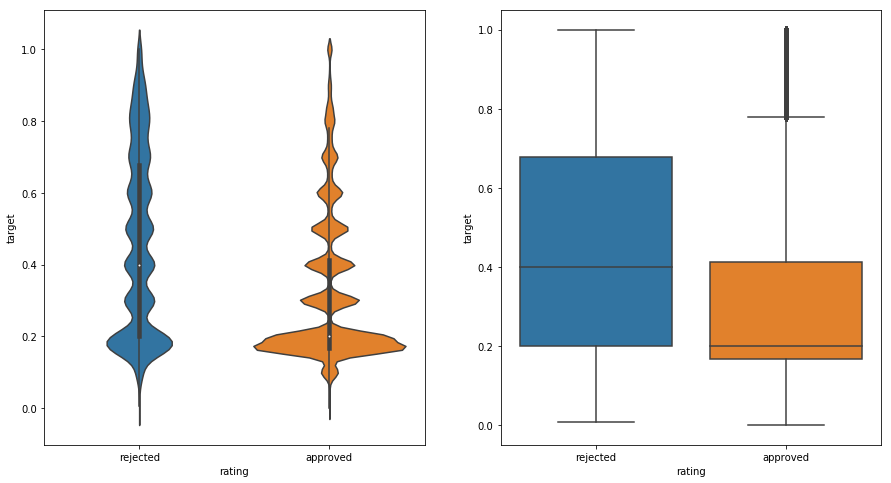

approved    1212225
rejected      52539
Name: rating, dtype: int64

In [18]:
fig, axes= plt.subplots(1,2, figsize= (15,8))
sns.violinplot(x='rating', y='target', data= train_target_nonzero, ax=axes[0])
sns.boxplot(x='rating', y='target', data= train_target_nonzero, ax=axes[1])
plt.show()
train_target_zero['rating'].value_counts()

In [19]:
train_sexual_explicit_nonzero= train[train['sexual_explicit']!=0]
train_sexual_explicit_zero= train[train['sexual_explicit']==0]
train_sexual_explicit_pos= train[train['sexual_explicit']>=0.5]
print(train_sexual_explicit_nonzero.shape, train_sexual_explicit_zero.shape, train_sexual_explicit_pos.shape)
train_sexual_explicit_nonzero.shape[0]/train.shape[0]*100, train_sexual_explicit_zero.shape[0]/train.shape[0]*100, train_sexual_explicit_pos.shape[0]/train.shape[0]*100

(68926, 45) (1735948, 45) (4686, 45)


(3.8188815396531837, 96.18111846034681, 0.25963031214367316)

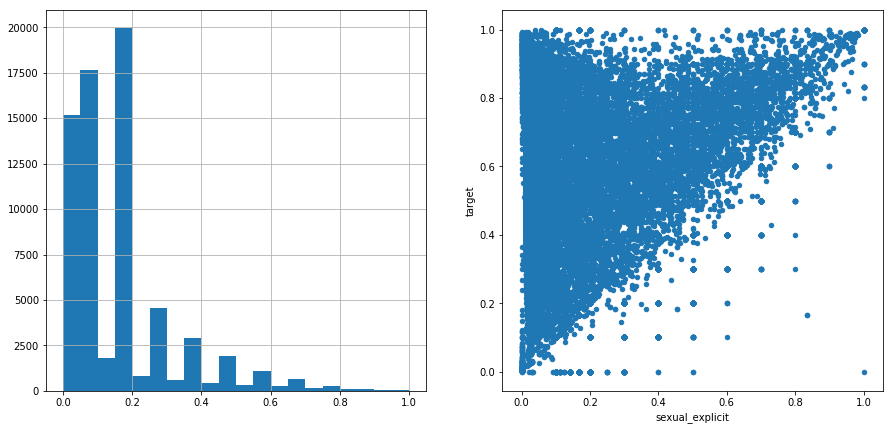

In [20]:
fig, axes= plt.subplots(1,2, figsize= (15,7))
train_sexual_explicit_nonzero['sexual_explicit'].hist(bins=20, ax= axes[0])
train_sexual_explicit_nonzero.plot.scatter(x= 'sexual_explicit', y= 'target', ax= axes[1])
plt.show()

In [21]:
# sns.countplot(x= 'disagree', data= train[train['disagree']!=0])
# plt.show()
train[(train['target']==0)&(train['sad']!=0)]

,id,target,comment_text,severe_toxicity,obscene,identity_attack,insult,threat,asian,atheist,...,article_id,rating,funny,wow,sad,likes,disagree,sexual_explicit,identity_annotator_count,toxicity_annotator_count
38766,289116,0.0,"State convention opted for Cruz, there tool.",0.0,0.000000,0.000000,0.000000,0.000000,NaN,NaN,...,97352,approved,0,0,1,0,0,0.000000,0,4
68607,326209,0.0,This is such a sad thing to hear. Losing a lov...,0.0,0.000000,0.000000,0.000000,0.000000,NaN,NaN,...,97718,approved,0,0,1,0,0,0.000000,0,4
73713,332491,0.0,"With a 50% royalty, might as well make it 100%...",0.0,0.000000,0.000000,0.000000,0.000000,NaN,NaN,...,137660,approved,0,0,1,0,0,0.000000,0,4
73761,332562,0.0,"So, basically, with this scheme, if the produc...",0.0,0.000000,0.000000,0.000000,0.000000,NaN,NaN,...,137660,approved,0,0,1,1,0,0.000000,0,4
73841,332669,0.0,How `bout we ask Big Oil if they'd float us a ...,0.0,0.000000,0.000000,0.000000,0.000000,NaN,NaN,...,137660,approved,0,0,1,1,0,0.000000,0,4
83005,344214,0.0,"I'm sorry, but people get to choose their prof...",0.0,0.000000,0.000000,0.000000,0.000000,NaN,NaN,...,138392,approved,0,0,1,5,0,0.000000,0,4
94623,358180,0.0,I Love them Alaskan Bush People. God Bless You...,0.0,0.000000,0.000000,0.000000,0.000000,NaN,NaN,...,97352,approved,1,1,1,0,1,0.000000,0,4
95683,359384,0.0,You totally misunderstood my post John F. I ...,0.0,0.000000,0.000000,0.166667,0.000000,NaN,NaN,...,139198,approved,0,0,1,0,0,0.000000,0,6
95763,359474,0.0,I understood your point. I can't see her Faceb...,0.0,0.000000,0.000000,0.000000,0.000000,NaN,NaN,...,139198,approved,0,0,1,0,0,0.000000,0,4
100005,364513,0.0,"I'm a fan of the show,because I love the outd...",0.0,0.000000,0.000000,0.000000,0.000000,NaN,NaN,...,78709,approved,2,0,1,1,0,0.000000,0,4


In [22]:
train[train['sad']!=0].shape

(142398, 45)

In [23]:
# train.loc[(train['identity_annotator_count']==5),'muslim'].unique()
train['publication_id'].value_counts()

54     627278
21     377686
102    213846
13     156682
55     133464
53     129243
22      54767
105     38934
100     23441
43      10952
6       10824
66       8095
93       3597
52       2323
87       1692
73       1651
84       1444
46       1271
67       1122
85        621
59        578
75        500
97        454
72        395
82        371
69        367
71        305
58        299
65        264
57        232
83        190
25        173
24        171
111       170
86        166
91        164
61        153
78        151
77        134
48        119
56        118
64        111
68        109
32         74
70         47
49         39
90         27
107        19
92         18
47         10
2           8
95          3
115         2
Name: publication_id, dtype: int64

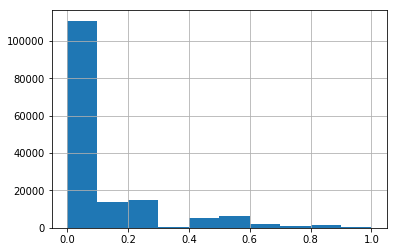

In [24]:
# train['identity_annotator_count'].value_counts()
train.loc[train['publication_id']==13,'target'].hist(bins=10) #value_counts()
plt.show()

In [25]:
train.shape, train.columns

((1804874, 45),
 Index(['id', 'target', 'comment_text', 'severe_toxicity', 'obscene',
        'identity_attack', 'insult', 'threat', 'asian', 'atheist', 'bisexual',
        'black', 'buddhist', 'christian', 'female', 'heterosexual', 'hindu',
        'homosexual_gay_or_lesbian', 'intellectual_or_learning_disability',
        'jewish', 'latino', 'male', 'muslim', 'other_disability',
        'other_gender', 'other_race_or_ethnicity', 'other_religion',
        'other_sexual_orientation', 'physical_disability',
        'psychiatric_or_mental_illness', 'transgender', 'white', 'created_date',
        'publication_id', 'parent_id', 'article_id', 'rating', 'funny', 'wow',
        'sad', 'likes', 'disagree', 'sexual_explicit',
        'identity_annotator_count', 'toxicity_annotator_count'],
       dtype='object'))

In [26]:
contraction_mapping = {"ain't": "is not", "aren't": "are not","can't": "cannot", "'cause": "because", "could've": "could have", 
                       "couldn't": "could not", "didn't": "did not",  "doesn't": "does not", "don't": "do not", "hadn't": "had not", 
                       "hasn't": "has not", "haven't": "have not", "he'd": "he would","he'll": "he will", "he's": "he is", "how'd": "how did", 
                       "how'd'y": "how do you", "how'll": "how will", "how's": "how is",  "I'd": "I would", "I'd've": "I would have", "I'll": "I will", 
                       "I'll've": "I will have","I'm": "I am", "I've": "I have", "i'd": "i would", "i'd've": "i would have", "i'll": "i will",  
                       "i'll've": "i will have","i'm": "i am", "i've": "i have", "isn't": "is not", "it'd": "it would", "it'd've": "it would have", 
                       "it'll": "it will", "it'll've": "it will have","it's": "it is", "let's": "let us", "ma'am": "madam", "mayn't": "may not", 
                       "might've": "might have","mightn't": "might not","mightn't've": "might not have", "must've": "must have", "mustn't": "must not",
                       "mustn't've": "must not have", "needn't": "need not", "needn't've": "need not have","o'clock": "of the clock", "oughtn't": "ought not",
                       "oughtn't've": "ought not have", "shan't": "shall not", "sha'n't": "shall not", "shan't've": "shall not have", 
                       "she'd": "she would", "she'd've": "she would have", "she'll": "she will", "she'll've": "she will have", "she's": "she is",
                       "should've": "should have", "shouldn't": "should not", "shouldn't've": "should not have", "so've": "so have","so's": "so as",
                       "this's": "this is","that'd": "that would", "that'd've": "that would have", "that's": "that is", "there'd": "there would", 
                       "there'd've": "there would have", "there's": "there is", "here's": "here is","they'd": "they would", "they'd've": "they would have", 
                       "they'll": "they will", "they'll've": "they will have", "they're": "they are", "they've": "they have", "to've": "to have",
                       "wasn't": "was not", "we'd": "we would", "we'd've": "we would have", "we'll": "we will", "we'll've": "we will have", 
                       "we're": "we are", "we've": "we have", "weren't": "were not", "what'll": "what will", "what'll've": "what will have", 
                       "what're": "what are",  "what's": "what is", "what've": "what have", "when's": "when is", "when've": "when have", 
                       "where'd": "where did", "where's": "where is", "where've": "where have", "who'll": "who will", "who'll've": "who will have",
                       "who's": "who is", "who've": "who have", "why's": "why is", "why've": "why have", "will've": "will have", "won't": "will not",
                       "won't've": "will not have", "would've": "would have", "wouldn't": "would not", "wouldn't've": "would not have",
                       "y'all": "you all", "y'all'd": "you all would","y'all'd've": "you all would have","y'all're": "you all are", "y'all've": "you all have",
                       "you'd": "you would", "you'd've": "you would have", "you'll": "you will", "you'll've": "you will have", "you're": "you are",
                       "you've": "you have" }


In [27]:
tokenizer=TweetTokenizer()
lem = WordNetLemmatizer()
def do_cleaning(x, contraction_map):
    x = str(x)
#     x= x.lower()
    x= re.sub(r'https?:\/\/[^ ]*', '', x) #to remove any urls
    x= re.sub(r'\d+.\d+.\d+.\d+', '', x)  #to remove any ip
    x= re.sub(r'\[\[.*\]', '', x)      #to remove any username enclosed in []
    
    for punct in "/-'":
        x = x.replace(punct, ' ')
    for punct in '&':
        x = x.replace(punct, f' {punct} ')
    for punct in '?!.,"#$%\'()*+-/:;<=>@[\\]^_`{|}~' + '“”’\n':
        x = x.replace(punct, '')
    x= re.sub(r' +', r' ', x)
    x= x.strip(' ')

    words=tokenizer.tokenize(x)
    
    # (')aphostophe  replacement (ie)   you're --> you are  
    # ( basic dictionary lookup : master dictionary present in a hidden block of code)
    words=[contraction_map[word] if word in contraction_map else word for word in words]
#     words=[lem.lemmatize(word, "v") for word in words]
    words = [w for w in words if not w in stop_words]
    
    clean_sent=" ".join(words)
    return clean_sent

train['comment_text_clean']= train['comment_text'].apply(lambda x: do_cleaning (x, contraction_mapping))
test['comment_text_clean']= test['comment_text'].apply(lambda x: do_cleaning (x, contraction_mapping))

In [28]:
# test.loc[test['comment_text_clean']=='', ['comment_text', 'comment_text_clean']]= '_na_'
# train.loc[train['comment_text_clean']=='', ['comment_text', 'comment_text_clean']]= '_na_'
test.loc[test['comment_text_clean']=='', 'comment_text_clean']= '_na_'
train.loc[train['comment_text_clean']=='', 'comment_text_clean']= '_na_'

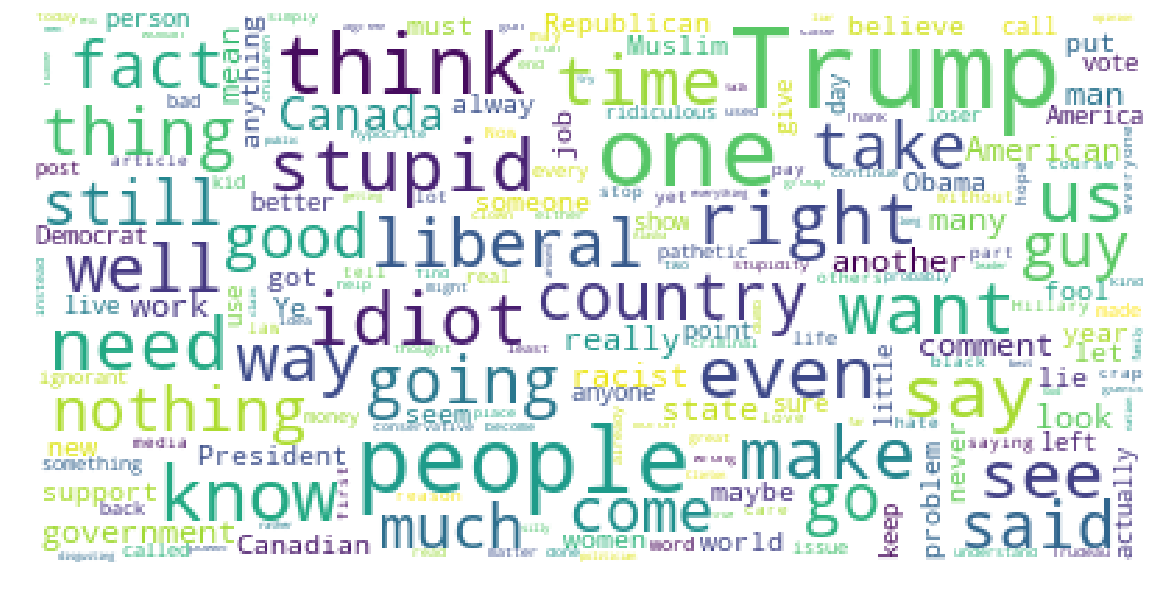

In [29]:
def make_wordcloud(text):
    stopwords = set(STOPWORDS)
    wordcloud = WordCloud(
                          background_color='white',
                          stopwords=stopwords,
                          max_words=200,
                          max_font_size=40, 
                          random_state=42
                         ).generate(text)
    print(wordcloud)
    fig = plt.figure(figsize= (20,16))
    plt.imshow(wordcloud)
    plt.axis('off')
    plt.show()
    
make_wordcloud(train.loc[train['target']>=0.5,'comment_text_clean'].str.cat(sep= ' '))   

In [30]:
glove= f'{path}../quora_insincere_question_classfication/data/glove.840B.300d/glove.840B.300d.txt'
wiki= f'{path}../quora_insincere_question_classfication/data/wiki-news-300d-1M/wiki-news-300d-1M.vec'
google= f'{path}../quora_insincere_question_classfication/data/GoogleNews-vectors-negative300/GoogleNews-vectors-negative300.bin'
# paragram= f'{path}data/paragram_300_sl999'
google_dict_tmp= {}
glove_dict_tmp= {}
wiki_dict_tmp= {}

def get_coefs(word,*arr): return word, np.asarray(arr, dtype='float32')
glove_dict_tmp = dict(get_coefs(*o.split(" ")) for o in open(glove))
wiki_dict_tmp = dict(get_coefs(*o.split(" ")) for o in open(wiki))

google_wv= KeyedVectors.load_word2vec_format(google, binary=True) 
google_vocab= google_wv.wv.vocab
for word in google_vocab:
    google_dict_tmp[word]= google_wv.wv[word]

del wiki_dict_tmp['999994']
del wiki_dict_tmp['saddler']

len(glove_dict_tmp)

# glove_dict= glove_dict_tmp
# wiki_dict= wiki_dict_tmp
# google_dict= google_dict_tmp

/opt/anaconda/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:14: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  
/opt/anaconda/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:16: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  app.launch_new_instance()


2196016

In [31]:
def make_vocab_cnt(sentences):
#     return Counter(texts.split(' '))
    vocab= {}
    for sentence in sentences:
        for word in sentence:
            if word in vocab:
                vocab[word]+=1
            else:
                vocab[word]= 1
    return vocab
#     retutn vocab_cnt

# vocab_cnt= make_vocab_cnt(train['question_text'].str.cat(sep=' '))
vocab_cnt= make_vocab_cnt(train['comment_text_clean'].apply(lambda x: x.split()).values)
print(len(list(vocab_cnt.keys())))

962758


In [32]:
def load_embedding(word_dict, embeddings_index): 
    embed_size = 300
    nb_words = len(word_dict)+1
#     embedding_matrix = np.zeros((nb_words, embed_size), dtype=np.float32)
    embedding_matrix= {}
    unknown_vector = np.zeros((embed_size,), dtype=np.float32) - 1.
    print(unknown_vector[:5])
    for key in tqdm(word_dict):
#         word = key
#         embedding_vector = embeddings_index.get(word)
#         if embedding_vector is not None:
#             embeddings_index[key] = embedding_vector
#             continue
        word = key.lower()
        embedding_vector = embeddings_index.get(word)
        if embedding_vector is not None:
            embeddings_index[key] = embedding_vector
            continue
        word = key.upper()
        embedding_vector = embeddings_index.get(word)
        if embedding_vector is not None:
            embeddings_index[key] = embedding_vector
            continue
        word = key.capitalize()
        embedding_vector = embeddings_index.get(word)
        if embedding_vector is not None:
            embeddings_index[key] = embedding_vector
            continue
#         word = ps.stem(key)
#         embedding_vector = embeddings_index.get(word)
#         if embedding_vector is not None:
#             embedding_matrix[key] = embedding_vector
#             continue
        word = lc.stem(key)
        embedding_vector = embeddings_index.get(word)
        if embedding_vector is not None:
            embeddings_index[key] = embedding_vector
            continue
        word = sb.stem(key)
        embedding_vector = embeddings_index.get(word)
        if embedding_vector is not None:
            embeddings_index[key] = embedding_vector
            continue
        word = lem.lemmatize(key, "v")
        embedding_vector = embeddings_index.get(word)
        if embedding_vector is not None:
            embeddings_index[key] = embedding_vector
            continue
#         embedding_matrix[key] = unknown_vector                    
    return embeddings_index, nb_words

glove_dict, n_words_glove= load_embedding(vocab_cnt, glove_dict_tmp)
wiki_dict, n_words_wiki= load_embedding(vocab_cnt, wiki_dict_tmp)
google_dict, n_words_google= load_embedding(vocab_cnt, google_dict_tmp)
print(len(glove_dict), len(wiki_dict), len(google_dict))

  0%|          | 0/962758 [00:00<?, ?it/s]

[-1. -1. -1. -1. -1.]


  2%|▏         | 18565/962758 [00:00<00:05, 185633.36it/s]

[-1. -1. -1. -1. -1.]


  2%|▏         | 19492/962758 [00:00<00:04, 194919.26it/s]

[-1. -1. -1. -1. -1.]


100%|██████████| 962758/962758 [00:24<00:00, 38719.65it/s]

2282766 375452 3091897


In [33]:
def calc_coverage(vocab, embedding):
    vocab_words= set(vocab.keys())
    embed_words= set(embedding.keys())
    common_words= vocab_words.intersection(embed_words)
    total_words_match= 0
    for word in common_words:
        total_words_match+=vocab[word]
    oov_words= vocab_words - common_words
    oov_words_cnt= []
    for word in oov_words:
        oov_words_cnt.append((word,vocab[word]))
    oov_words_cnt.sort(key= itemgetter(1), reverse= True)
    total_corpus_len= sum(list(vocab.values()))
    pcntg_common_words= (len(common_words)/len(vocab_words))*100
    total_pcntg_words_match= (total_words_match/total_corpus_len)*100
    print(len(vocab_words), len(embed_words), len(common_words), pcntg_common_words, total_pcntg_words_match)
    return oov_words_cnt
# oov_words= calc_coverage(vocab_cnt, glove_dict)
oov_words= calc_coverage(vocab_cnt, google_dict)
print(oov_words[:100])

962758 3091897 294888 30.62950398750257 96.80742550226124
[('10', 25969), ('\xad', 23885), ('20', 20827), ('100', 18363), ('50', 17184), ('30', 15450), ('15', 13897), ('40', 10532), ('—', 10355), ('25', 10083), ('…', 9784), ('12', 9689), ('2016', 8936), ('60', 8024), ('11', 7668), ('–', 7038), ('2017', 6814), ('90', 6562), ('70', 6418), ('18', 6198), ('2015', 6148), ('80', 6136), ('16', 5593), ('24', 5219), ('35', 5108), ('‘', 4980), ('13', 4763), ('1000', 4654), ('14', 4653), ('17', 4602), ('200', 4122), ('500', 4016), ('21', 4009), ('2000', 3646), ('45', 3636), ('2014', 3500), ('2008', 3447), ('doesnt', 3198), ('22', 3142), ('300', 3133), ('didnt', 2990), ('75', 2970), ('19', 2924), ('2018', 2737), ('2019', 2711), ('150', 2703), ('2013', 2695), ('65', 2637), ('48', 2611), ('2012', 2557), ('_na_', 2536), ('2010', 2479), ('10000', 2244), ('23', 2210), ('99', 2190), ('400', 2115), ('2009', 2109), ('2020', 2089), ('26', 2053), ('27', 2029), ('28', 2024), ('isnt', 2009), ('2011', 1978), (

In [42]:
vocab_size= 30000
embed_size= 300
NUM_MODELS = 2
BATCH_SIZE = 512
LSTM_UNITS = 128
DENSE_HIDDEN_UNITS = 4 * LSTM_UNITS
EPOCHS = 4
MAX_LEN = 200

In [35]:
# ## Indirect features

# #Sentense count in each comment:
# def add_meta_features(df):
#     # '\n' can be used to count the number of sentences in each comment
#     df['count_sent']=df["comment_text"].apply(lambda x: len(re.findall("\n",str(x)))+1)
#     #Word count in each comment:
#     df['count_word']=df["comment_text"].apply(lambda x: len(str(x).split()))
#     #Unique word count
#     df['count_unique_word']=df["comment_text"].apply(lambda x: len(set(str(x).split())))
#     #Letter count
#     df['count_letters']=df["comment_text"].apply(lambda x: len(str(x)))
#     #punctuation count
#     df["count_punctuations"] =df["comment_text"].apply(lambda x: len([c for c in str(x) if c in string.punctuation]))
#     #upper case words count
#     df["count_words_upper"] = df["comment_text"].apply(lambda x: len([w for w in str(x).split() if w.isupper()]))
#     #title case words count
#     df["count_words_title"] = df["comment_text"].apply(lambda x: len([w for w in str(x).split() if w.istitle()]))
#     #Number of stopwords
#     df["count_stopwords"] = df["comment_text"].apply(lambda x: len([w for w in str(x).lower().split() if w in stop_words]))
#     #Average length of the words
#     df["mean_word_len"] = df["comment_text"].apply(lambda x: np.mean([len(w) for w in str(x).split()]))
#     return df

# train= add_meta_features(train)
# test= add_meta_features(test)

In [36]:
# from sklearn.preprocessing import StandardScaler
# scaler= StandardScaler()

# classes= ['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']
train_df, val_df = train_test_split(train, test_size=0.1)
train_X= train_df['comment_text_clean'].values
val_X= val_df['comment_text_clean'].values
test_X= test['comment_text_clean'].values
# train_meta_feat= train_df.iloc[:, 9:].values
# val_meta_feat= val_df.iloc[:, 9:].values
# test_meta_feat= test.iloc[:, 3:].values
# scaler.fit(train_meta_feat)
# train_meta_feat= scaler.transform(train_meta_feat)
# val_meta_feat= scaler.transform(val_meta_feat)
# test_meta_feat= scaler.transform(test_meta_feat)
train_y= train_df['target'].values
val_y= val_df['target'].values
train_y= np.where(train_y>=0.5, 1, 0)
val_y= np.where(val_y>=0.5,1, 0)
# print( train.shape, test.shape,train.columns, test.columns)
# # print(train_df['target'].value_counts()[0]/train_df['target'].value_counts()[1])
# # print(val_df['target'].value_counts()[0]/val_df['target'].value_counts()[1])

In [37]:
## Tokenize the sentences
tokenizer = Tokenizer(num_words=vocab_size)
tokenizer.fit_on_texts(list(train_X))
train_X = tokenizer.texts_to_sequences(train_X)
val_X = tokenizer.texts_to_sequences(val_X)
test_X = tokenizer.texts_to_sequences(test_X)

## Pad the sentences 
train_X = pad_sequences(train_X, maxlen=maxlen)
val_X = pad_sequences(val_X, maxlen=maxlen)
test_X = pad_sequences(test_X, maxlen=maxlen)

In [38]:
def extend_embed(embed_dict, vocab_size):
    all_embs = np.stack(embed_dict.values())
    emb_mean,emb_std = all_embs.mean(), all_embs.std()
    embed_size = all_embs.shape[1]
    word_index = tokenizer.word_index
    nb_words = min(vocab_size, len(word_index))
    embedding_matrix = np.random.normal(emb_mean, emb_std, (nb_words, embed_size))
    for word, i in word_index.items():
        if i >= vocab_size: continue
        embedding_vector = embed_dict.get(word)
        if embedding_vector is not None: embedding_matrix[i] = embedding_vector
    return embedding_matrix

glove_embed_mat= extend_embed(glove_dict, vocab_size)
wiki_embed_mat= extend_embed(wiki_dict, vocab_size)
google_embed_mat= extend_embed(google_dict, vocab_size)

embedding_matrix= np.concatenate((glove_embed_mat, wiki_embed_mat), axis=1)
# embedding_matrix= np.mean((glove_embed_mat, wiki_embed_mat, google_embed_mat), axis=0)
# embedding_matrix= glove_embed_mat

In [52]:
# embed_size= embedding_matrix.shape[1]
# inp = Input(shape=(maxlen,))
# # x = Embedding(vocab_size, embed_size, weights=[embedding_matrix], trainable= False)(inp)
# x = Embedding(vocab_size, embed_size, weights=[embedding_matrix])(inp)
# x = Bidirectional(LSTM(50, return_sequences=True, dropout=0.1, recurrent_dropout=0.1))(x)
# x = GlobalMaxPool1D()(x)
# x = Dense(50, activation="relu")(x)
# x = Dropout(0.1)(x)
# x = Dense(6, activation="sigmoid")(x)
# model = Model(inputs=inp, outputs=x)
# model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

def build_model(embedding_matrix):
    embed_size= embedding_matrix.shape[1]
    # n_meta_feat= train_meta_feat.shape[1]
    inp = Input(shape=(maxlen,))
    x = Embedding(vocab_size, embed_size, weights=[embedding_matrix], trainable= False)(inp)
    x = SpatialDropout1D(0.2)(x)
    x = Bidirectional(GRU(LSTM_UNITS, return_sequences=True))(x)
    x = Bidirectional(GRU(LSTM_UNITS, return_sequences=True))(x)
    avg_pool = GlobalAveragePooling1D()(x)
    max_pool = GlobalMaxPooling1D()(x)
    # meta_inp= Input(shape= (n_meta_feat,))
    # x = concatenate([avg_pool, max_pool, meta_inp])
    x = concatenate([avg_pool, max_pool])
    x = Dense(DENSE_HIDDEN_UNITS, activation="relu")(x)
    x = Dense(DENSE_HIDDEN_UNITS, activation="relu")(x)
    x = Dropout(0.1)(x)
    x = Dense(1, activation="sigmoid")(x)
    # model = Model(inputs=[inp, meta_inp], outputs=x)
    model = Model(inputs=inp, outputs=x)
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

In [54]:
checkpoint_predictions = []
weights = []
for model_idx in range(NUM_MODELS):
    model = build_model(embedding_matrix)
    for global_epoch in range(EPOCHS):
        model.fit(train_X, train_y, batch_size=BATCH_SIZE, epochs=1, verbose=-1, validation_data=(val_X, val_y),callbacks=[LearningRateScheduler(lambda _: 1e-3 * (0.6 ** global_epoch))])
        checkpoint_predictions.append(model.predict(val_X, batch_size=2048)[0].flatten())
        weights.append(2 ** global_epoch)

predictions = np.average(checkpoint_predictions, weights=weights, axis=0)

Train on 1624386 samples, validate on 180488 samples
Epoch 1/1
Train on 1624386 samples, validate on 180488 samples
Epoch 1/1
Train on 1624386 samples, validate on 180488 samples
Epoch 1/1
Train on 1624386 samples, validate on 180488 samples
Epoch 1/1
Train on 1624386 samples, validate on 180488 samples
Epoch 1/1
Train on 1624386 samples, validate on 180488 samples
Epoch 1/1
Train on 1624386 samples, validate on 180488 samples
Epoch 1/1
Train on 1624386 samples, validate on 180488 samples
Epoch 1/1


In [67]:
preds= model.predict(val_X, batch_size=2048)
type(preds)

numpy.ndarray

In [69]:
preds_bin= np.where(preds>=0.5,1 ,0).flatten()
preds_bin[:100]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0])

In [79]:
((preds_bin==1)&(val_y==1)).sum()

7790

In [41]:
# model.fit([train_X, train_meta_feat], train_y, batch_size=512, epochs=2, validation_data=([val_X, val_meta_feat], val_y))
model.fit(train_X, train_y, batch_size=256, epochs=3, validation_data=(val_X, val_y))

Instructions for updating:
Use tf.cast instead.
Instructions for updating:
Deprecated in favor of operator or tf.math.divide.
Train on 1624386 samples, validate on 180488 samples
Epoch 1/3
1624386/1624386 [==============================] - 5649s 3ms/step - loss: 0.1420 - acc: 0.9467 - val_loss: 0.1306 - val_acc: 0.9495
Epoch 2/3
1624386/1624386 [==============================] - 5669s 3ms/step - loss: 0.1302 - acc: 0.9504 - val_loss: 0.1278 - val_acc: 0.9505
Epoch 3/3
1624386/1624386 [==============================] - 5618s 3ms/step - loss: 0.1251 - acc: 0.9521 - val_loss: 0.1276 - val_acc: 0.9509


In [ ]:
# # y_test = model.predict([test_X, test_meta_feat], batch_size=1024, verbose=1)
# y_test = model.predict(test_X, batch_size=1024, verbose=1)
# sample_submission = pd.read_csv(f'{path}data/sample_submission.csv')
# sample_submission[classes] = y_test
# sample_submission.to_csv(f'{path}data/submission.csv', index=False)

In [66]:
import keras_bert